# Time Series Basics

In [1]:
# Initial imports
import pandas as pd
import os
import datetime
import requests
import alpaca_trade_api as tradeapi
from pathlib import Path
from datetime import datetime,date
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import alpaca_trade_api as tradeapi
import ccxt

%matplotlib inline
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
Kraken_Public_Key = os.getenv("KRAKEN_API_KEY")
Kraken_Secret_Key = os.getenv("KRAKEN_SECRET_KEY")

# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': Kraken_Public_Key,
    'secret': Kraken_Secret_Key,
})

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(Kraken_Public_Key)}")
print(f"Kraken secren data type: {type(Kraken_Secret_Key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


In [3]:
# Connect to Kraken and load the available cryptocurrencies
Crypto_Details = exchange.load_markets()

# Import data as a Pandas DataFrame
Crypto_df = pd.DataFrame(Crypto_Details)

# Display sample data
Crypto_df

,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/ETH,ADA/EUR,ADA/USD,ADA/USDT,ADA/BTC,...,ZEC/EUR,ZEC/USD,YFI/ETH,YFI/EUR,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,USD/CAD,USD/JPY
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
tierBased,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
taker,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,...,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.002,0.002,0.002,0.002
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.002,0.002,0.002,0.002
tiers,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...",...,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000..."
precision,"{'amount': 8, 'price': 4}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 7}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 8}",...,"{'amount': 8, 'price': 3}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 0}","{'amount': 8, 'price': 0}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}"
limits,"{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...",...,"{'amount': {'min': 0.03, 'max': 100000000.0}, ...","{'amount': {'min': 0.03, 'max': 100000000.0}, ...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
id,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAETH,ADAEUR,ADAUSD,ADAUSDT,ADAXBT,...,XZECZEUR,XZECZUSD,YFIETH,YFIEUR,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZUSDZCAD,ZUSDZJPY
symbol,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/ETH,ADA/EUR,ADA/USD,ADA/USDT,ADA/BTC,...,ZEC/EUR,ZEC/USD,YFI/ETH,YFI/EUR,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,USD/CAD,USD/JPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,ADA,...,ZEC,ZEC,YFI,YFI,YFI,YFI,EUR,GBP,USD,USD


In [4]:
# Print column values of DataFrame
print(type(Crypto_df.columns.values))
print(Crypto_df.columns.values)
print(len(Crypto_df.columns.values))

<class 'numpy.ndarray'>
['AAVE/ETH' 'AAVE/EUR' 'AAVE/GBP' 'AAVE/USD' 'AAVE/BTC' 'ADA/ETH'
 'ADA/EUR' 'ADA/USD' 'ADA/USDT' 'ADA/BTC' 'ALGO/ETH' 'ALGO/EUR' 'ALGO/USD'
 'ALGO/BTC' 'ANT/ETH' 'ANT/EUR' 'ANT/USD' 'ANT/BTC' 'ATOM/ETH' 'ATOM/EUR'
 'ATOM/USD' 'ATOM/BTC' 'AUD/JPY' 'AUD/USD' 'BAL/ETH' 'BAL/EUR' 'BAL/USD'
 'BAL/BTC' 'BAT/ETH' 'BAT/EUR' 'BAT/USD' 'BAT/BTC' 'BCH/AUD' 'BCH/ETH'
 'BCH/EUR' 'BCH/GBP' 'BCH/JPY' 'BCH/USD' 'BCH/USDT' 'BCH/BTC' 'COMP/ETH'
 'COMP/EUR' 'COMP/USD' 'COMP/BTC' 'CRV/ETH' 'CRV/EUR' 'CRV/USD' 'CRV/BTC'
 'DAI/EUR' 'DAI/USD' 'DAI/USDT' 'DASH/EUR' 'DASH/USD' 'DASH/BTC' 'DOT/ETH'
 'DOT/EUR' 'DOT/USD' 'DOT/USDT' 'DOT/BTC' 'EOS/ETH' 'EOS/EUR' 'EOS/USD'
 'EOS/USDT' 'EOS/BTC' 'ETH2.S/ETH' 'ETH/AUD' 'ETH/CHF' 'ETH/DAI'
 'ETH/USDC' 'ETH/USDT' 'EUR/AUD' 'EUR/CAD' 'EUR/CHF' 'EUR/GBP' 'EUR/JPY'
 'FIL/ETH' 'FIL/EUR' 'FIL/USD' 'FIL/BTC' 'GNO/ETH' 'GNO/EUR' 'GNO/USD'
 'GNO/BTC' 'GRT/ETH' 'GRT/EUR' 'GRT/USD' 'GRT/BTC' 'ICX/ETH' 'ICX/EUR'
 'ICX/USD' 'ICX/BTC' 'KAVA/ETH' 'KAVA/EUR' 

In [5]:
# Show list of available functions for the current exchange (in this case Kraken)
exchange.has

{'loadMarkets': True,
 'cancelAllOrders': False,
 'cancelOrder': True,
 'cancelOrders': False,
 'CORS': False,
 'createDepositAddress': True,
 'createLimitOrder': True,
 'createMarketOrder': True,
 'createOrder': True,
 'deposit': False,
 'editOrder': 'emulated',
 'fetchBalance': True,
 'fetchClosedOrders': True,
 'fetchCurrencies': True,
 'fetchDepositAddress': True,
 'fetchDeposits': True,
 'fetchL2OrderBook': True,
 'fetchLedger': True,
 'fetchMarkets': True,
 'fetchMyTrades': True,
 'fetchOHLCV': True,
 'fetchOpenOrders': True,
 'fetchOrder': True,
 'fetchOrderBook': True,
 'fetchOrderBooks': False,
 'fetchOrders': False,
 'fetchOrderTrades': 'emulated',
 'fetchStatus': 'emulated',
 'fetchTicker': True,
 'fetchTickers': True,
 'fetchTime': True,
 'fetchTrades': True,
 'fetchTradingFee': True,
 'fetchTradingFees': True,
 'fetchFundingFee': False,
 'fetchFundingFees': False,
 'fetchTradingLimits': False,
 'fetchTransactions': False,
 'fetchWithdrawals': True,
 'privateAPI': True,
 'p

## Fetch Historical Data for BTC/USD and ETH/USD

In [6]:
# Fetch daily candlestick bar data from `BTC/USD`
BTC_Historical_Prices = exchange.fetch_ohlcv("BTC/USD", "1d")
# Fetch daily candlestick bar data from `ETH/USD`
ETH_Historical_Prices = exchange.fetch_ohlcv("ETH/USD", "1d")
# Fetch daily candlestick bar data from `XRP/USD`
XRP_Historical_Prices = exchange.fetch_ohlcv("XRP/USD", "1d")

# Import the data as a Pandas DataFrame and set the columns
BTC_Historical_Prices_df = pd.DataFrame(
    BTC_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)
ETH_Historical_Prices_df = pd.DataFrame(
    ETH_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)
XRP_Historical_Prices_df = pd.DataFrame(
    XRP_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)

In [7]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
BTC_Historical_Prices_df["date"] = pd.to_datetime(
    BTC_Historical_Prices_df["timestamp"], unit="ms"
)
ETH_Historical_Prices_df["date"] = pd.to_datetime(
    ETH_Historical_Prices_df["timestamp"], unit="ms"
)
XRP_Historical_Prices_df["date"] = pd.to_datetime(
    XRP_Historical_Prices_df["timestamp"], unit="ms"
)

In [8]:
# Pick all Cryptos close prices
BTC_df = BTC_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])
ETH_df = ETH_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])
XRP_df = XRP_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])
# Use the `rename` function and set the `columns` parameter to a dictionary of new column names
BTC_df = BTC_df.rename(columns={
    "close": "BTC Close",
    "date": "Date"
})
ETH_df = ETH_df.rename(columns={
    "close": "ETH Close",
    "date": "Date 1"
})
XRP_df = XRP_df.rename(columns={
    "close": "XRP Close",
    "date": "Date 2"
})

In [9]:
# Use a list of re-ordered column names to alter the column order of the original DataFrame
BTC_df = BTC_df[["Date", "BTC Close"]]
ETH_df = ETH_df[["Date 1", "ETH Close"]]
XRP_df = XRP_df[["Date 2", "XRP Close"]]
# Concatenate all DataFrames into a single DataFrame
Combined_Cryptos = pd.concat([ BTC_df, ETH_df, XRP_df ], axis="columns", join="inner")
Combined_Cryptos.sort_index(inplace=True)
Combined_Cryptos.head()

,Date,BTC Close,Date 1,ETH Close,Date 2,XRP Close


In [10]:
# Remove extra date columns
Combined_Cryptos = Combined_Cryptos.drop(columns=["Date 1", "Date 2"])
Combined_Cryptos

,Date,BTC Close,ETH Close,XRP Close


In [11]:
# Select all rows for 1 Day
Combined_price_1day = Combined_Cryptos.loc['2021-01-07':'2021-01-11']
Combined_price_1day.head()

,Date,BTC Close,ETH Close,XRP Close


## Portfolio Analysis

In [12]:
# Set Alpaca API key and secret
Alpaca_API_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
Alpaca = tradeapi.REST(
    Alpaca_API_Key,
    Alpaca_Secret_Key,
    base_url='https://paper-api.alpaca.markets', 
    api_version="v2")

In [13]:
#Alpaca.list_assets(status='active')

In [14]:
# Format current date as ISO format
#Start_Date = pd.to_datetime('2016-01-1', parse_dates=True)
#End_Date = pd.to_datetime('2021-01-11', parse_dates=True)

Start_Date = pd.Timestamp("2016-01-1", tz="America/New_York").isoformat()
End_Date = pd.Timestamp("2021-01-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AAPL"]

#"BXP", "PLD", "NOC", "BA", "PYPL", "SQ", "JNJ", "PFE", "TSLA",
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Stocks
Data = Alpaca.get_barset(
    tickers,
    timeframe,
    start = Start_Date,
    end = End_Date
).df

# Preview DataFrame
Data

AAPL                                      
                             open      high      low   close     volume
2016-01-04 00:00:00-05:00  102.61  105.3680  102.000  105.33   47840273
2016-01-05 00:00:00-05:00  105.75  105.8500  102.410  102.71   47319218
2016-01-06 00:00:00-05:00  100.56  102.3700   99.870  100.70   60124085
2016-01-07 00:00:00-05:00   98.68  100.1300   96.430   96.54   68083100
2016-01-08 00:00:00-05:00   98.55   99.1100   96.760   96.98   60400480
...                           ...       ...      ...     ...        ...
2021-01-05 00:00:00-05:00  128.89  131.7400  128.430  130.95   85139362
2021-01-06 00:00:00-05:00  127.72  131.0499  126.382  126.58  142064548
2021-01-07 00:00:00-05:00  128.36  131.6300  127.860  130.85   95314687
2021-01-08 00:00:00-05:00  132.43  132.6300  130.230  131.99   93211863
2021-01-11 00:00:00-05:00  129.19  130.1700  128.500  128.98   84845947

[1265 rows x 5 columns]

In [15]:
# Format the DateTime to remove Time
Data.index = Data.index.strftime("%Y-%m-%d")

In [16]:
# Pick all Stocks volumes
AAPL_volume_df = Data["AAPL"]["volume"]

In [17]:
# Rename Column
AAPL_volume_df.columns = ["Apple"]

In [18]:
# Select all rows for 5 Days
volume_5days = AAPL_volume_df.loc['2021-01-05':'2021-01-11']

In [19]:
# Select all rows for 1 Month
volume_1Month = AAPL_volume_df.loc['2020-12-11':'2021-01-11']

In [20]:
# Select all rows for 6 Months
volume_6Months = AAPL_volume_df.loc['2020-06-11':'2021-01-11']

In [21]:
# Select all rows for 1 Year
volume_1Year = AAPL_volume_df.loc['2019-01-11':'2021-01-11']

In [22]:
# Plot 5 Days
volume_5days.hvplot.bar(
    figsize=(20,15), 
    subplots=True, 
    title=('Volumes Over 5 Days'),
    height=600,
    width=1200,
    ylabel='Total Volumes', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 12, 'yticks': 15})

:Bars   [index]   (volume)

In [23]:
# Plot 1 Month
volume_1Month.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=600,
    width=1200,
    subplots=True, 
    title=('Volumes Over 30 Days'), 
    ylabel='Total Volumes', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 12, 'yticks': 15})

:Bars   [index]   (volume)

In [24]:
# Plot 6 Months
volume_6Months.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=600,
    width=1200,
    subplots=True, 
    title=('Volumes Over 6 Months'), 
    ylabel='Total Volumes', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 4, 'yticks': 15})

:Bars   [index]   (volume)

In [25]:
# Plot 1 Year
volume_1Year_plot = volume_1Year.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=600,
    width=1200,
    subplots=True, 
    title=('Volumes Over 12 Months'), 
    ylabel='Total Volumes', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 2, 'yticks': 15})
volume_1Year_plot

:Bars   [index]   (volume)

In [26]:
# Pick all Stocks close prices
AAPL_close_df = Data["AAPL"]["close"]
# Rename Column
AAPL_close_df.columns = ["Apple"]

In [27]:
# Import Brick Plot
import bokeh
bokeh.sampledata.download()
from math import pi
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

Using data directory: /Users/miladnazar/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [28]:
# Plot 5 Days Closing Prices
price_5days = Data["AAPL"]['2021-01-05':'2021-01-11']
price_5days["date"] = pd.to_datetime(price_5days.index)

inc = price_5days.close > price_5days.open
dec = price_5days.open > price_5days.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "APPLE Candlestick Closing Prices Over 5 Days", height=600)

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_5days.date, price_5days.high, price_5days.date, price_5days.low, color="black")
p.vbar(price_5days.date[inc], w, price_5days.open[inc], price_5days.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_5days.date[dec], w, price_5days.open[dec], price_5days.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [29]:

# Plot 1 Month Closing Prices
price_1Month = Data["AAPL"]['2020-12-11':'2021-01-11']
price_1Month["date"] = pd.to_datetime(price_1Month.index)

inc = price_1Month.close > price_1Month.open
dec = price_1Month.open > price_1Month.close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1500, height=600)

p.title.text = "APPLE Closing Prices Over 30 Days"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_1Month.date, price_1Month.high, price_1Month.date, price_1Month.low, color="black")
p.vbar(price_1Month.date[inc], w, price_1Month.open[inc], price_1Month.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_1Month.date[dec], w, price_1Month.open[dec], price_1Month.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [30]:
# Plot 3 Months Closing Prices
price_3Months = Data["AAPL"]['2020-10-11':'2021-01-11']
price_3Months["date"] = pd.to_datetime(price_3Months.index)

inc = price_3Months.close > price_3Months.open
dec = price_3Months.open > price_3Months.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1500, title = "APPLE Candlestick Closing Prices Over 90 Days", height=600)

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_3Months.date, price_3Months.high, price_3Months.date, price_3Months.low, color="black")
p.vbar(price_3Months.date[inc], w, price_3Months.open[inc], price_3Months.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_3Months.date[dec], w, price_3Months.open[dec], price_3Months.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [31]:
# Plot 6 Months Closing Prices
price_6Months = Data["AAPL"]['2020-06-11':'2021-01-11']
price_6Months["date"] = pd.to_datetime(price_6Months.index)

inc = price_6Months.close > price_6Months.open
dec = price_6Months.open > price_6Months.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1500, title = "APPLE Candlestick Closing Prices Over 6 Months", height=600)

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_6Months.date, price_6Months.high, price_6Months.date, price_6Months.low, color="black")
p.vbar(price_6Months.date[inc], w, price_6Months.open[inc], price_6Months.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_6Months.date[dec], w, price_6Months.open[dec], price_6Months.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [32]:
# Plot 12 Months Closing Prices
price_1Year = Data["AAPL"]['2020-01-11':'2021-01-11']
price_1Year["date"] = pd.to_datetime(price_1Year.index)

inc = price_1Year.close > price_1Year.open
dec = price_1Year.open > price_1Year.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "APPLE Candlestick Closing Prices Over 12 Months", height=600)

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_1Year.date, price_1Year.high, price_1Year.date, price_1Year.low, color="black")
p.vbar(price_1Year.date[inc], w, price_1Year.open[inc], price_1Year.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_1Year.date[dec], w, price_1Year.open[dec], price_1Year.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [33]:
# Calculate Daily Returns for all the stocks
AAPL_close_df_pct = AAPL_close_df.pct_change()

## Combining Daily Returns

In [34]:
# Rename Column
AAPL_close_df_pct.columns = ["Apple"]
AAPL_close_df_pct

2016-01-04         NaN
2016-01-05   -0.024874
2016-01-06   -0.019570
2016-01-07   -0.041311
2016-01-08    0.004558
                ...   
2021-01-05    0.011900
2021-01-06   -0.033372
2021-01-07    0.033734
2021-01-08    0.008712
2021-01-11   -0.022805
Name: close, Length: 1265, dtype: float64

## Daily Returns

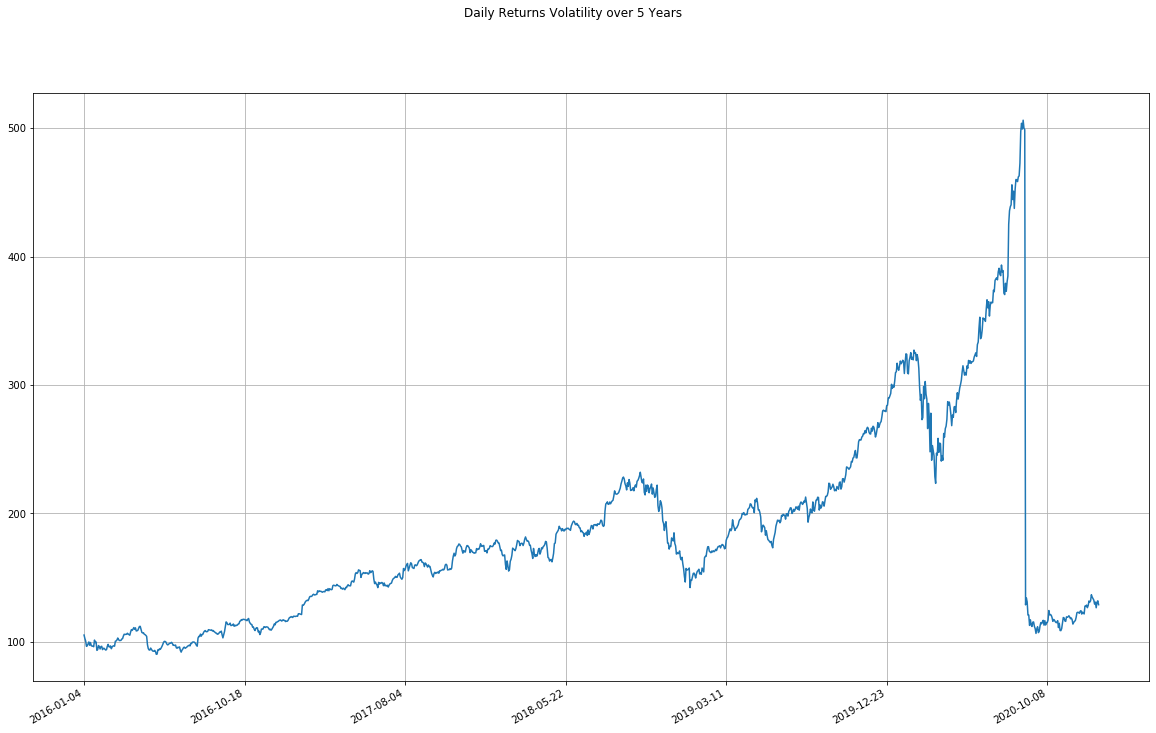

In [35]:
# Plot the closing prices using a line plot
AAPL_close_df.plot(
    figsize=(20,12), 
    title="Daily Returns Volatility over 5 Years",
    subplots=True,
    grid=True);

### Cumulative Returns

In [36]:
# Plot cumulative returns??????????????
#Cumulative_Returns = (1 + Combined_PCT_Returns).cumprod()
#Cumulative_Returns.plot(
#    kind='line', 
#    figsize=(20,12),
#    title="Cumulative Returns over 5 Years",
#    fontsize=14,
#    #subplots=True,
#    grid=True);

## Risk

In [37]:
# Box plot to visually show risk
#Combined_PCT_Returns.plot(
#    kind = "box", 
#    figsize=(20,12),
#    title="Risk Plot of Daily Returns Volatility over 5 Years",
#    fontsize=10,
#    #subplots=True,
#    grid=True);

## Standard Deviation

In [38]:
# Daily Standard Deviations for each portfolio. 
#Combined_PCT_Returns_STD = pd.DataFrame(Combined_PCT_Returns.std())
#Combined_PCT_Returns_STD.columns = ["Daily Standard Deviation"]
#Combined_PCT_Returns_STD

In [39]:
# Determine which portfolios are riskier than the S&P 500
#print("The Below Portfolios are Riskier than S&P 500")
#Riskier_GSPC = Combined_PCT_Returns_STD.loc[Combined_PCT_Returns_STD["Daily Standard Deviation"] > Combined_PCT_Returns_STD.loc["S&P 500", "Daily Standard Deviation"]]
#Riskier_GSPC

## Exponentially Weighted Moving Average

In [40]:
# Calculate a rolling window using the exponentially weighted moving average. 
#Combined_PCT_Returns.ewm(halflife = 21).std().plot(
#    kind='line', 
#    figsize=(20,12),
#    title="Exponentially Weighted Moving Average over 21 days window",
#    fontsize=12,
#    #subplots=True,
#    grid=True);

## Analysis

In [41]:
#print("Our analysis includes the following:")
#print("==========================================================================")
# The annualized standard deviation (252 trading days) for all portfolios:
#print("The annualized standard deviation (252 trading days) for all portfolios:")
#Annualized = Combined_PCT_Returns.rolling(window=252).std()
#Annualized.dropna(inplace=True)
#print(Annualized.tail())

# The plotted rolling standard deviation using a 21 trading day window for all portfolios:
#print()
#print("The plotted rolling standard deviation using a 21 trading day window for all portfolios:")
#Combined_PCT_Returns.rolling(window=21).std().plot(
#    kind='line',
#    figsize=(20, 12),
#    title="The plotted rolling standard deviation using a 21 trading day",
#    fontsize=12,
    #subplots=True,
#    grid=True);

In [42]:
# The calculated annualized Sharpe Ratios and the accompanying bar plot visualization:
#print("The calculated annualized Sharpe Ratios and the accompanying bar plot visualization:")
#print("====================================================================================")
#print()
# Calculate annualized Sharpe Ratios
#Anunualized_Sharpe_Ratios = (Combined_PCT_Returns.mean() * 252) / (Combined_PCT_Returns.std() * np.sqrt(252))
#print(Anunualized_Sharpe_Ratios)
#print()
#print("Bar Plot for Sharp Ratio")
# Visualize the sharpe ratios as a bar plot
#Anunualized_Sharpe_Ratios.plot(
#    kind='bar', 
#    title="Sharpe Ratios - Return to Risk",
#    figsize=(18,12),
#    fontsize=12,
    #subplots=True,
#    grid=True);

In [43]:
# Construct a correlation table
#print("A correlation between portfolios")
#print("================================================================")
#Correlation = Combined_PCT_Returns.corr()
#Correlation
#sns.heatmap(Correlation, vmin=-1, vmax=1);

In [44]:
# Using your custom portfolio and one other of your choosing:
# The plotted beta. . How does your portfolio fair?")
#print("How does your portfolio fair?")
#print("=============================")
#print("Based on the below example, information, and  plots We'd say that BTC, Tesla, and Apple were the best stocks/coins to Invest")
#print("For example: A $10,000 investement in BitCoin would be $294,226 today. (Highest of them)")
#print("For example: A $10,000 investement in Tesla would be $167,800 today. (Second Highest of them)")
#print("For example: A $10,000 investement in Tesla would be $167,800 today. (Second Highest of them)")
#print()
#Best_Portfolio = (1+ Combined_PCT_Returns).cumprod()
#Best_Portfolio.rolling(window=21).std().plot(
#    kind='line', 
#    figsize=(20, 12),
#    title="Best 21 days window on Portfolios to Invest",
#    fontsize=12,
#    #subplots=True,
#    grid=True);
#
#Initial_Investment = 10000
#Cumulative_Profit = Initial_Investment * Best_Portfolio
#print(Cumulative_Profit.tail())
#Cumulative_Profit.plot(
#    kind='line',
#    figsize=(20, 12),
#    title="Best Portfolio to make Investment",
#    fontsize=12,
#    #subplots=True,
#    grid=True);

## Forecasting

In [57]:
AAPL_close_df_pct = AAPL_close_df_pct.dropna()
AAPL_close_df_pct.head()

2016-01-05   -0.024874
2016-01-06   -0.019570
2016-01-07   -0.041311
2016-01-08    0.004558
2016-01-11    0.015983
Name: close, dtype: float64

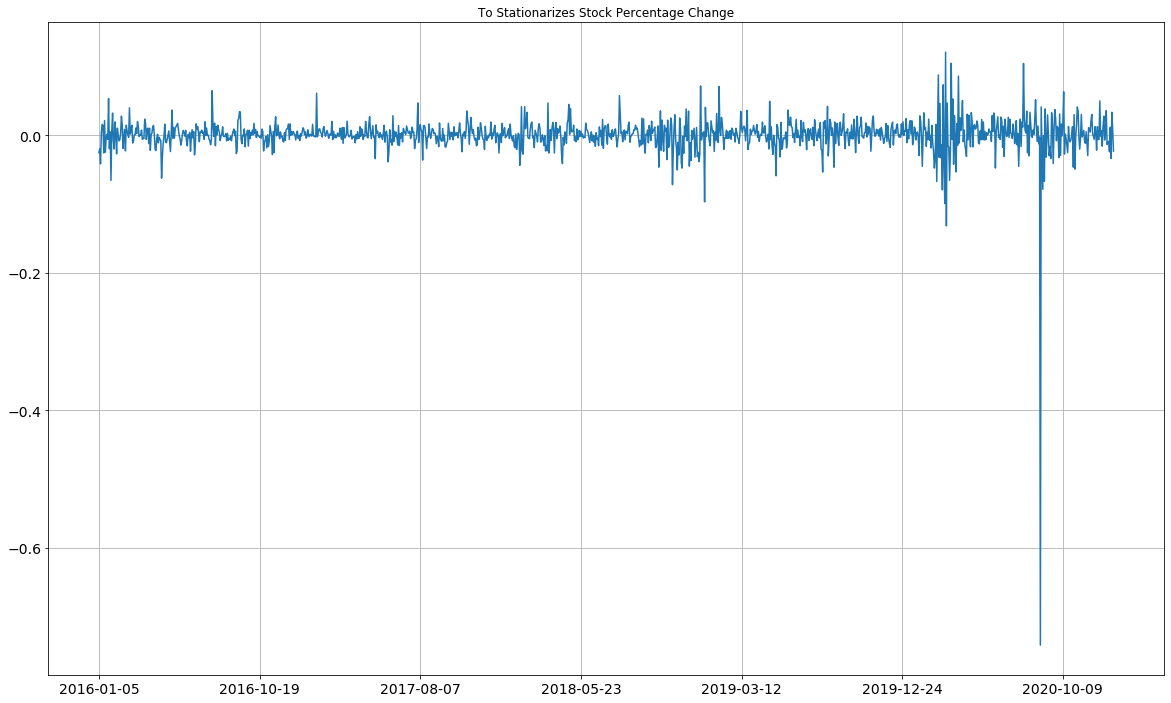

In [77]:
AAPL_close_df_pct.plot(
    title="To Stationarizes Stock Percentage Change",
    figsize=(20,12),
    fontsize=14,
    #subplots=True,
    grid=True);

## ARMA Model

In [96]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [60]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(AAPL_close_df_pct.values, order=(1,1))

In [98]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_ARMA_2 = ARMA(AAPL_close_df.values, order=(1,1))

In [64]:
AAPL_close_df_pct.tail()

2021-01-05    0.011900
2021-01-06   -0.033372
2021-01-07    0.033734
2021-01-08    0.008712
2021-01-11   -0.022805
Name: close, dtype: float64

In [61]:
# Fit the model to the data
results = model.fit()

In [99]:
# Fit the model to the data
results_close = model_ARMA_2.fit()

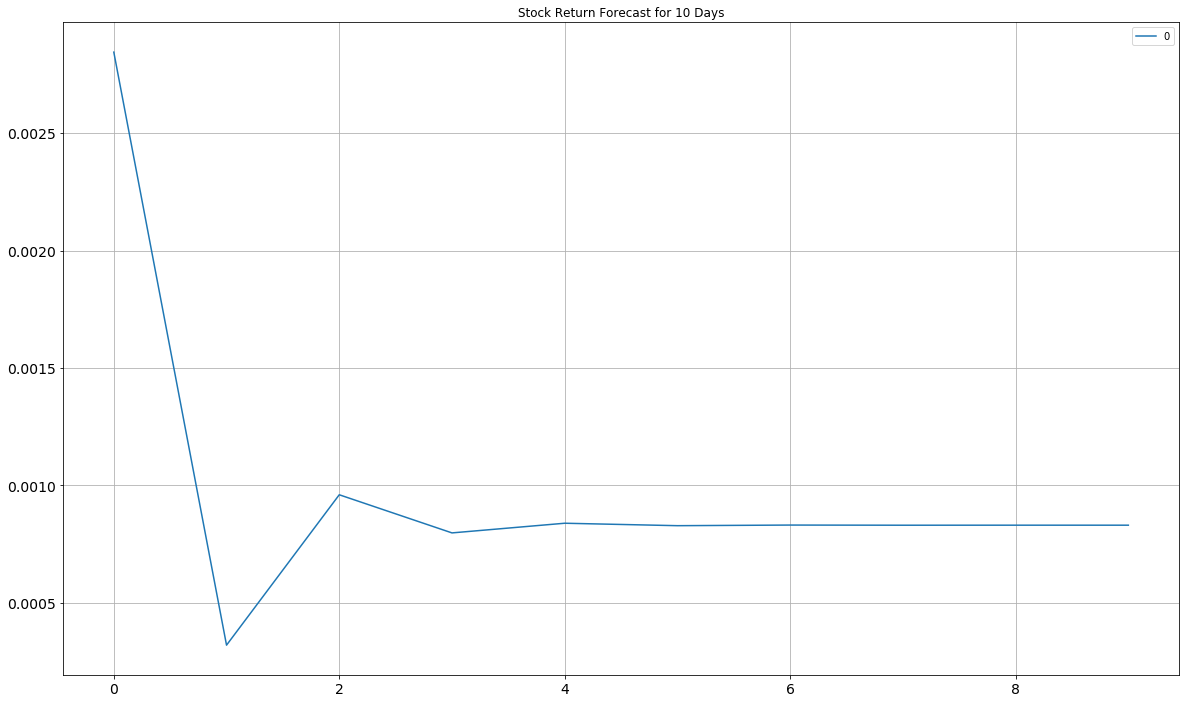

In [66]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(
    title="Stock Return Forecast for 10 Days",
    figsize=(20,12),
    fontsize=14,
    #subplots=True,
    grid=True);

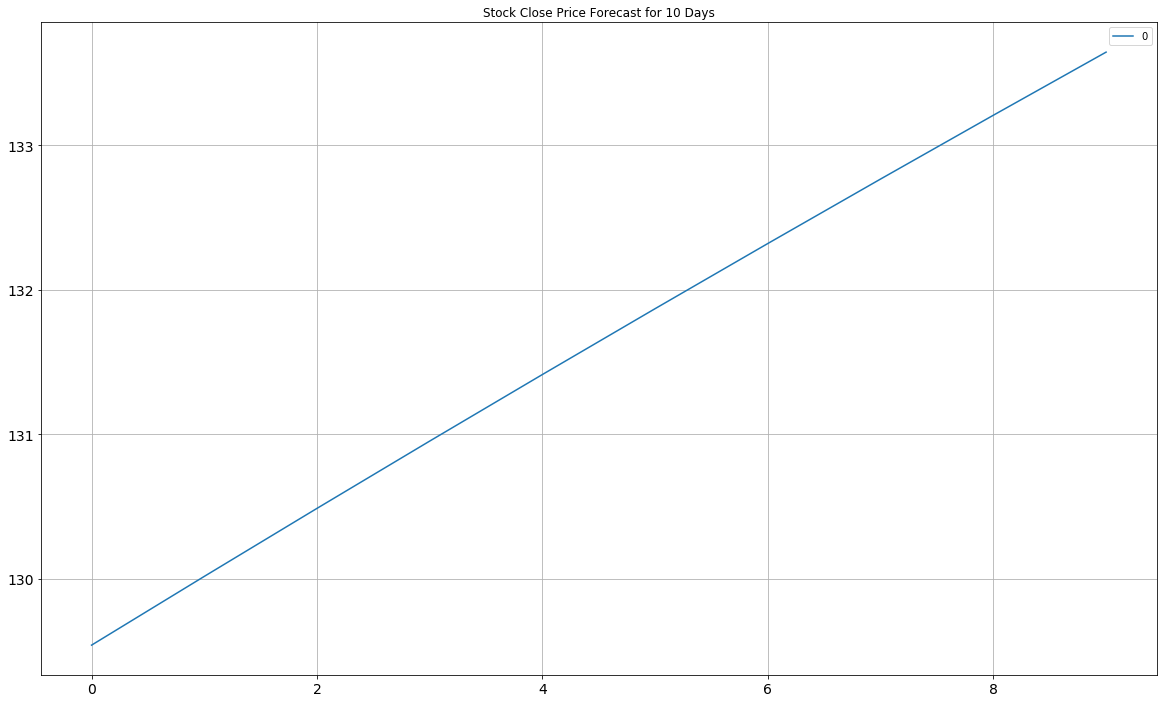

In [100]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results_close.forecast(steps=10)[0]).plot(
    title="Stock Close Price Forecast for 10 Days",
    figsize=(20,12),
    fontsize=14,
    #subplots=True,
    grid=True);

In [65]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1264
Model:                     ARMA(1, 1)   Log Likelihood                2717.408
Method:                       css-mle   S.D. of innovations              0.028
Date:                Tue, 12 Jan 2021   AIC                          -5426.816
Time:                        19:18:35   BIC                          -5406.248
Sample:                             0   HQIC                         -5419.088
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.122      0.262      -0.001       0.002
ar.L1.y       -0.2536      0.202     -1.257      0.209      -0.649       0.142
ma.L1.y        0.1691      0.204      0.827      0.408      -0.232       0.570
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.9434           +0.0000j            3.9434            0.5000
MA.1           -5.9149           +0.0000j            5.9149            0.5000
-----------------------------------------------------------------------------
"""

In [101]:
results_close.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1265
Model:                     ARMA(1, 1)   Log Likelihood               -4853.379
Method:                       css-mle   S.D. of innovations             11.203
Date:                Tue, 12 Jan 2021   AIC                           9714.758
Time:                        19:36:56   BIC                           9735.329
Sample:                             0   HQIC                          9722.487
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.9719     26.975      6.449      0.000     121.101     226.843
ar.L1.y        0.9893      0.004    248.996      0.000       0.982       0.997
ma.L1.y       -0.0235      0.027     -0.858      0.391      -0.077       0.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0108           +0.0000j            1.0108            0.0000
MA.1           42.5554           +0.0000j           42.5554            0.0000
-----------------------------------------------------------------------------
"""

## ARIMA Model

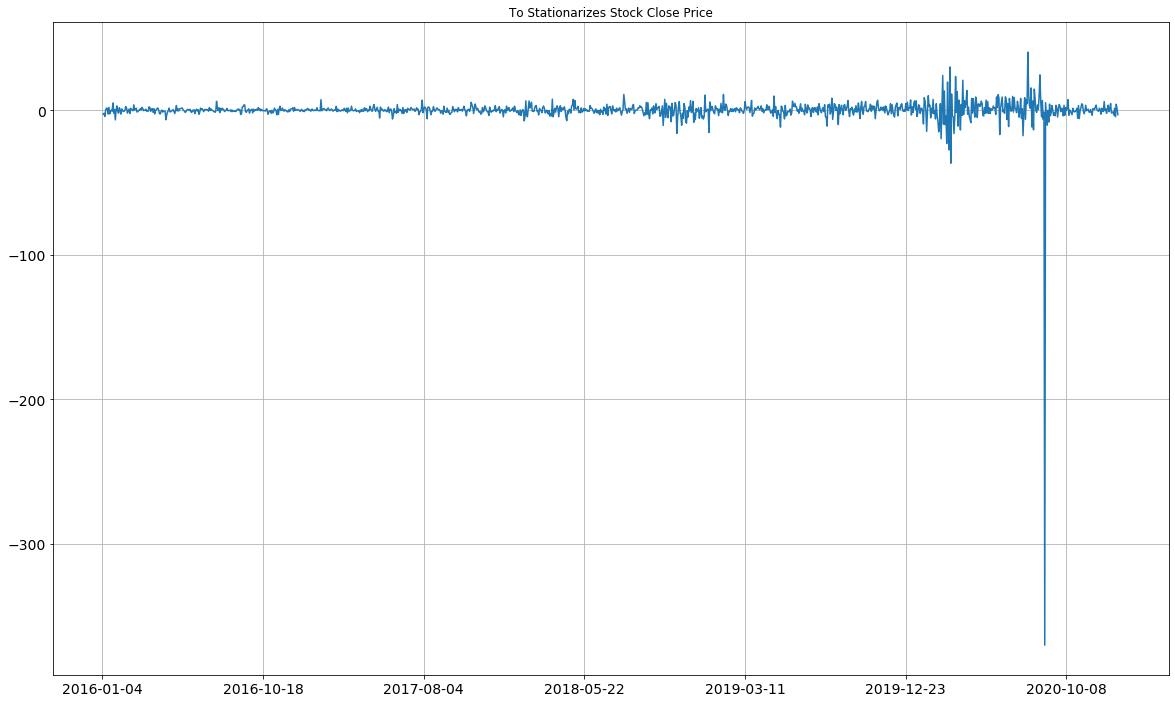

In [75]:
# Differencing the Close price stationarizes the time series
AAPL_close_df.diff().plot(
    title="To Stationarizes Stock Close Price",
    figsize=(20,12),
    fontsize=14,
    #subplots=True,
    grid=True);

## Autocorrelation and Partial Autocorrelation Analysis

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

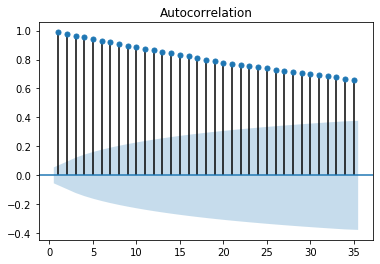

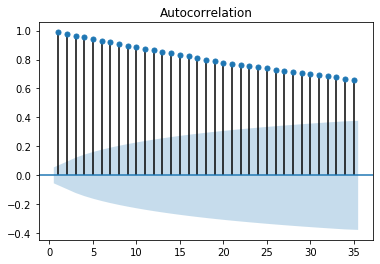

In [81]:
# Plot the autocorrelation of the Close Prices
plot_acf(AAPL_close_df, zero=False, lags=35)

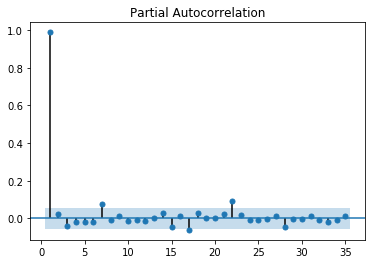

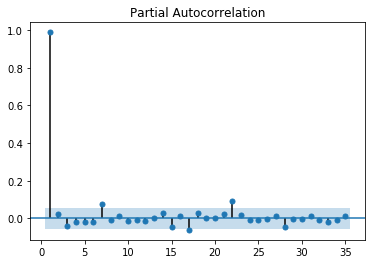

In [107]:
# Plot the partial autocorrelation of the returns
plot_pacf(AAPL_close_df, zero=False, lags=35)

## ARIMA Model

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
# Create an ARIMA model
model = ARIMA(AAPL_close_df.values, order=(1, 1, 1))

In [87]:
# Fit the model to the data
results_ARIMA = model.fit()

In [88]:
# Print the model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4850.769
Method:                       css-mle   S.D. of innovations             11.231
Date:                Tue, 12 Jan 2021   AIC                           9709.538
Time:                        19:29:10   BIC                           9730.106
Sample:                             1   HQIC                          9717.266
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.308      0.061      0.951      -0.585       0.623
ar.L1.D.y     -0.4146      0.352     -1.178      0.239      -1.105       0.275
ma.L1.D.y      0.3803      0.357      1.065      0.287      -0.320       1.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4121           +0.0000j            2.4121            0.5000
MA.1           -2.6293           +0.0000j            2.6293            0.5000
-----------------------------------------------------------------------------
"""

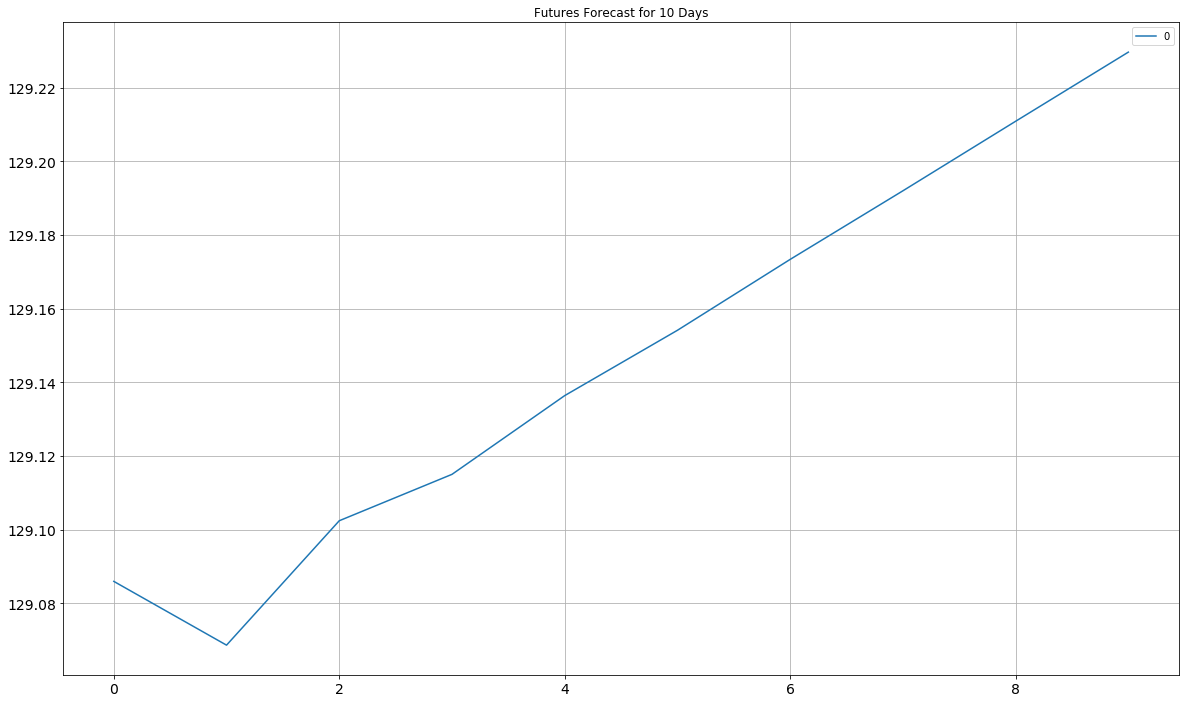

In [90]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA.forecast(steps=10)[0]).plot(
    title="Futures Forecast for 10 Days",
    figsize=(20,12),
    fontsize=14,
    #subplots=True,
    grid=True);

## ARIMA Model using a Lag of 2

In [92]:
# Create an ARIMA Model and fit it to the data
model_2 = ARIMA(AAPL_close_df.values, order=(2, 1, 1))
results_ARIMA_2 = model_2.fit()

In [94]:
# print the model summary
results_ARIMA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1264
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4850.370
Method:                       css-mle   S.D. of innovations             11.228
Date:                Tue, 12 Jan 2021   AIC                           9710.741
Time:                        19:32:15   BIC                           9736.451
Sample:                             1   HQIC                          9720.401
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.321      0.058      0.954      -0.611       0.648
ar.L1.D.y      0.2820      0.517      0.545      0.586      -0.732       1.296
ar.L2.D.y      0.0413      0.030      1.385      0.166      -0.017       0.100
ma.L1.D.y     -0.3117      0.517     -0.603      0.547      -1.326       0.702
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5750           +0.0000j            2.5750            0.0000
AR.2           -9.4046           +0.0000j            9.4046            0.5000
MA.1            3.2079           +0.0000j            3.2079            0.0000
-----------------------------------------------------------------------------
"""

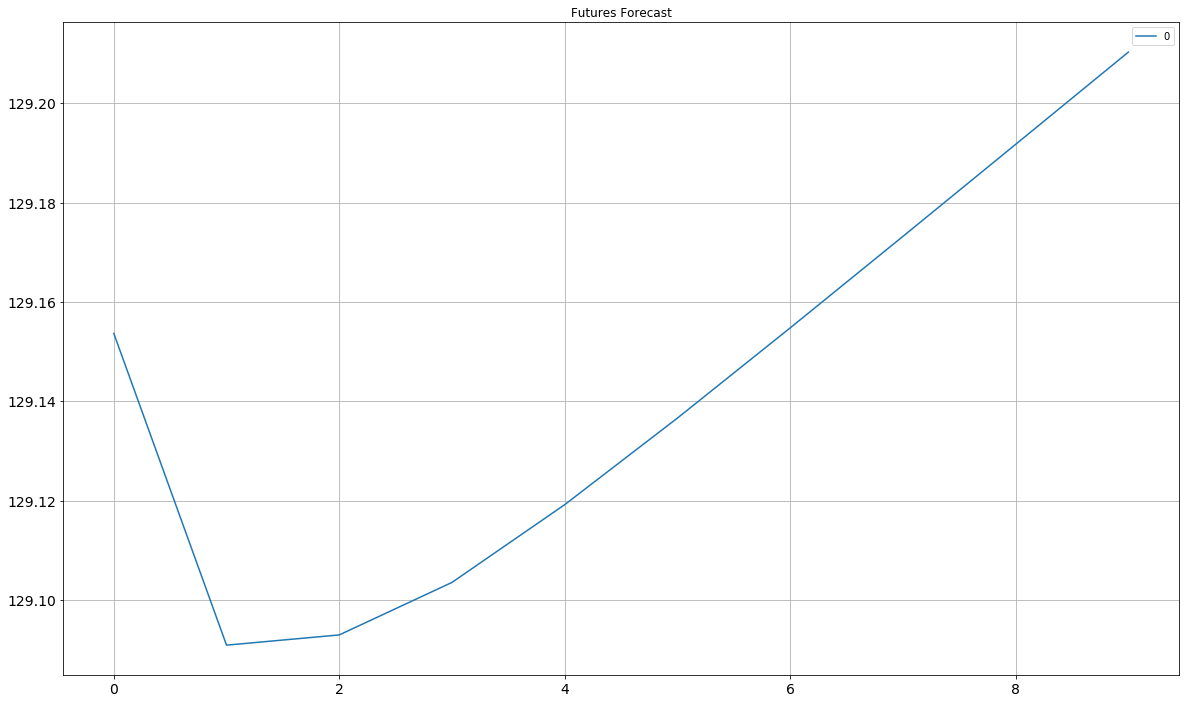

In [95]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_2.forecast(steps=10)[0]).plot(
    title="Futures Forecast",
    figsize=(20,12),
    fontsize=14,
    #subplots=True,
    grid=True);

## Yield